<a href="https://colab.research.google.com/github/Sievv/Sievv/blob/main/Escherichia_coli_(E_coli)Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# Mounted at /content/drive (This is a comment and should not be part of the code)

Mounted at /content/drive
Mounted at /content/drive


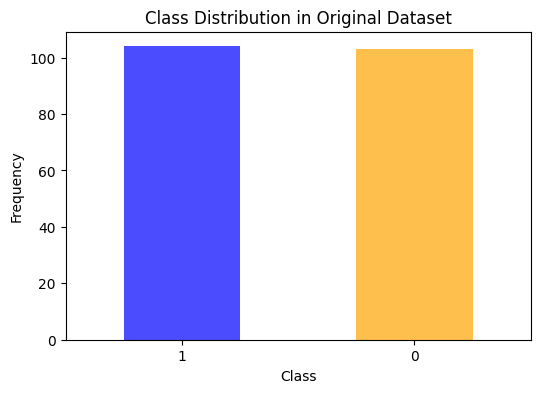

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load datasets
active = pd.read_csv('/content/drive/MyDrive/EC/E.coli_Active_coding v1.csv')
inactive = pd.read_csv('/content/drive/MyDrive/EC/inactive_ec 104.csv')

# Combine and shuffle datasets
data = pd.concat([active, inactive], ignore_index=True)
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Plot original class distribution
plt.figure(figsize=(6, 4))
data['Activity'].value_counts().plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
plt.title("Class Distribution in Original Dataset")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()
data = pd.concat([active, inactive], ignore_index=True)
data = data.sample(frac=1, random_state=42).reset_index(drop=True)


In [41]:
import pandas as pd

# Load datasets
active = pd.read_csv('/content/drive/MyDrive/EC/E.coli_Active_coding v1.csv')
inactive = pd.read_csv('/content/drive/MyDrive/EC/inactive_ec 104.csv')

# Check for missing values
print("Missing Values:")
print(data.isnull().sum())


# Basic summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Data types of columns
print("\nData Types:")
print(data.dtypes)

Missing Values:
ID                               0
Sequence                       103
Length                           0
Charge                           0
Hydrophobicity                   0
Molecular_Weight                 0
Isoelectric_Point                0
Number_of_Cysteines              0
Number_of_Disulfide_Bridges      0
Flexibility                      0
Helix                            0
Turn                             0
Sheet                            0
A                                0
C                                0
D                                0
E                                0
F                                0
G                                0
H                                0
I                                0
K                                0
L                                0
M                                0
N                                0
P                                0
Q                                0
R                                0
S   

Columns in 'active' DataFrame:
Index(['ID', 'Sequence ', 'Length', 'Charge', 'Hydrophobicity',
       'Molecular_Weight', 'Isoelectric_Point', 'Number_of_Cysteines',
       'Number_of_Disulfide_Bridges', 'Flexibility', 'Helix', 'Turn', 'Sheet',
       'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q',
       'R', 'S', 'T', 'V', 'W', 'Y', 'Activity'],
      dtype='object')

Columns in 'inactive' DataFrame:
Index(['ID', 'Sequence', 'Length', 'Charge', 'Hydrophobicity',
       'Molecular_Weight', 'Isoelectric_Point', 'Number_of_Cysteines',
       'Number_of_Disulfide_Bridges', 'Flexibility', 'Helix', 'Turn', 'Sheet',
       'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q',
       'R', 'S', 'T', 'V', 'W', 'Y', 'Activity'],
      dtype='object')


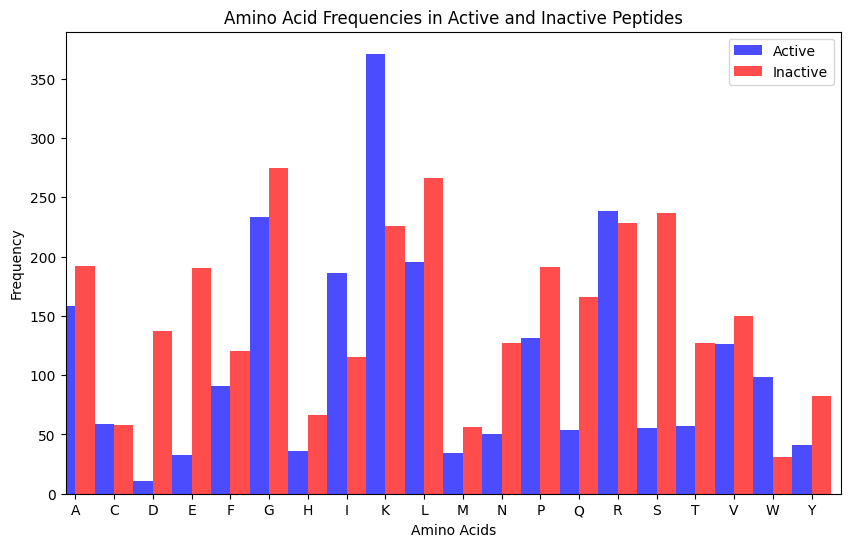

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
active = pd.read_csv('/content/drive/MyDrive/EC/E.coli_Active_coding v1.csv')
inactive = pd.read_csv('/content/drive/MyDrive/EC/inactive_ec 104.csv')

# Print the column names of the active DataFrame to find the sequence column
print("Columns in 'active' DataFrame:")
print(active.columns)

# Print the column names of the inactive DataFrame to find the sequence column
print("\nColumns in 'inactive' DataFrame:")
print(inactive.columns)

# Function to count amino acids in a sequence
def count_amino_acids(sequence):
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
    if not isinstance(sequence, str):
        # Return zero counts for non-string entries (like NaN)
        return {aa: 0 for aa in amino_acids}
    return {aa: sequence.count(aa) for aa in amino_acids}

# Column names containing amino acid sequences (adjusted based on your column names)
active_sequence_column_name = 'Sequence '  # Replace with exact column name from active DataFrame
inactive_sequence_column_name = 'Sequence'  # Replace with exact column name from inactive DataFrame

# Apply amino acid counting function
active['aa_counts'] = active[active_sequence_column_name].astype(str).str.strip().apply(count_amino_acids)
inactive['aa_counts'] = inactive[inactive_sequence_column_name].astype(str).str.strip().apply(count_amino_acids)

# Convert amino acid counts into DataFrame for plotting
active_aa_counts = pd.DataFrame(active['aa_counts'].tolist())
inactive_aa_counts = pd.DataFrame(inactive['aa_counts'].tolist())

# Plot the comparison of amino acid frequencies
plt.figure(figsize=(10, 6))

# Plot for active peptides
active_aa_counts.sum().plot(kind='bar', color='blue', alpha=0.7, label='Active', position=1)

# Plot for inactive peptides
inactive_aa_counts.sum().plot(kind='bar', color='red', alpha=0.7, label='Inactive', position=0)

plt.title("Amino Acid Frequencies in Active and Inactive Peptides")
plt.xlabel("Amino Acids")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.legend()
plt.show()


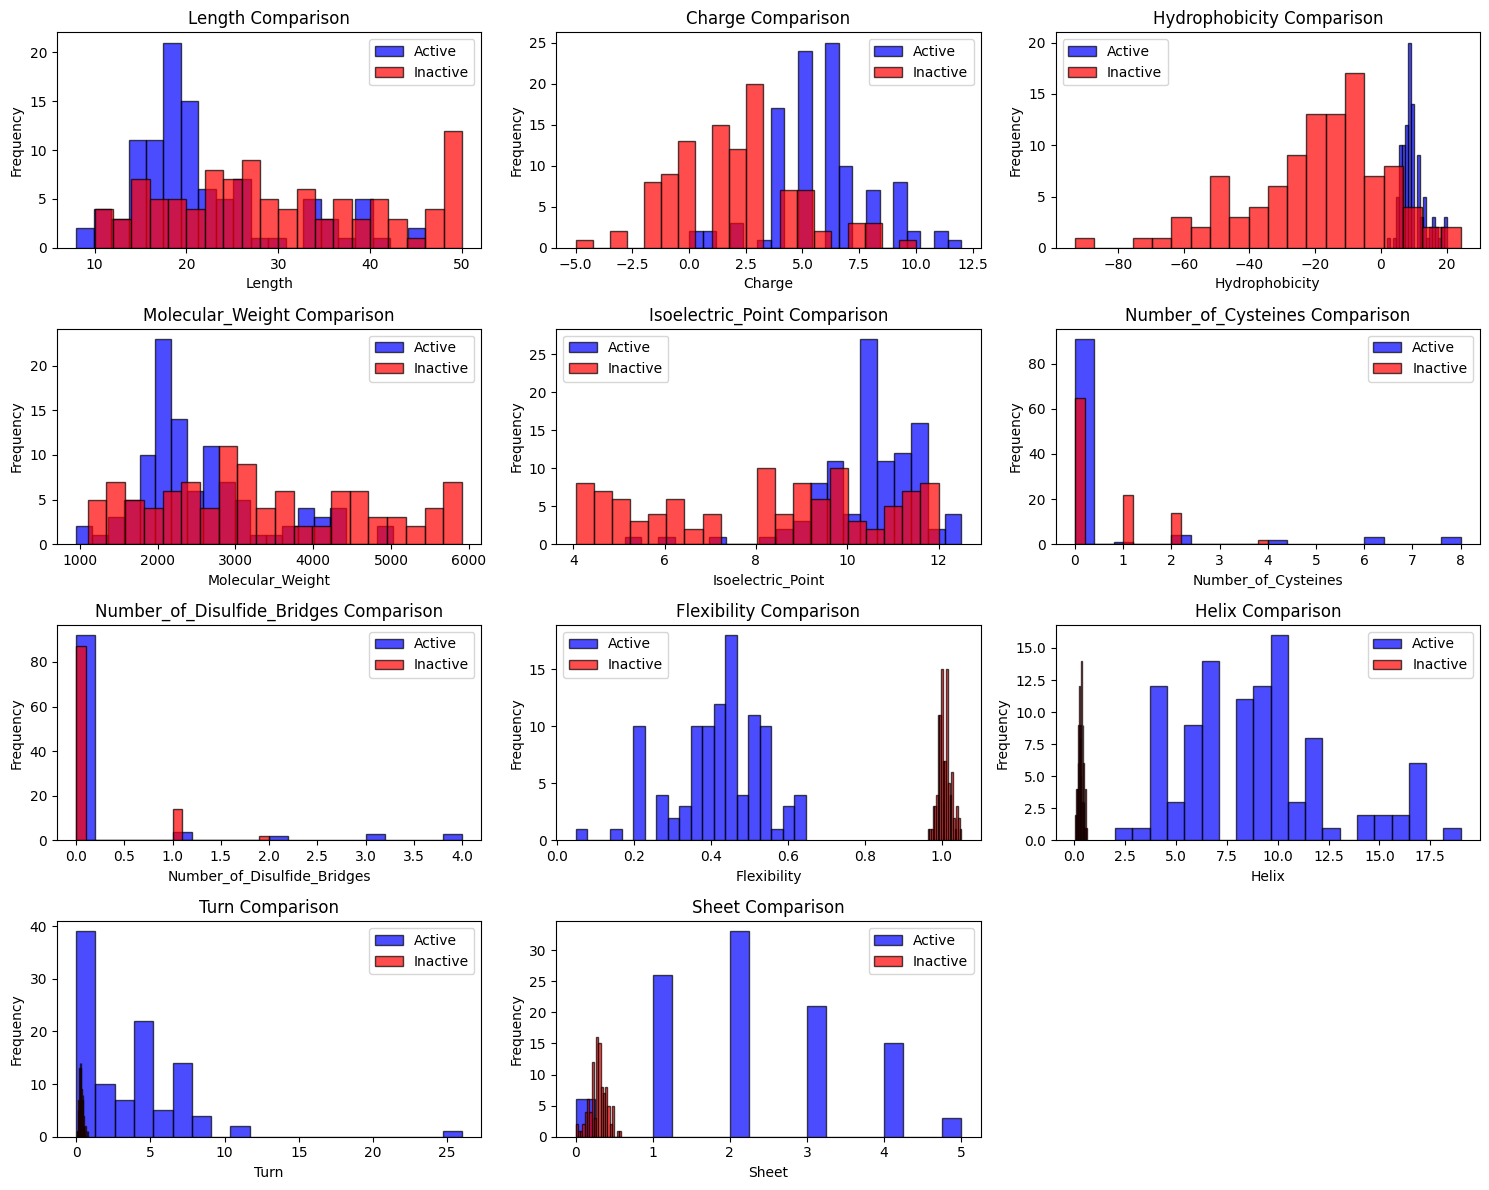

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
active = pd.read_csv('/content/drive/MyDrive/EC/E.coli_Active_coding v1.csv')
inactive = pd.read_csv('/content/drive/MyDrive/EC/inactive_ec 104.csv')

# Define the list of physicochemical properties to compare
physicochemical_properties = [
    'Length', 'Charge', 'Hydrophobicity', 'Molecular_Weight', 'Isoelectric_Point',
    'Number_of_Cysteines', 'Number_of_Disulfide_Bridges', 'Flexibility', 'Helix', 'Turn', 'Sheet'
]

# Plot histograms for comparison
plt.figure(figsize=(15, 12))

# Loop through each physicochemical property and create a histogram
for i, property in enumerate(physicochemical_properties, 1):
    plt.subplot(4, 3, i)  # Create a subplot grid of 4 rows and 3 columns
    plt.hist(active[property], bins=20, alpha=0.7, color='blue', label='Active', edgecolor='black')
    plt.hist(inactive[property], bins=20, alpha=0.7, color='red', label='Inactive', edgecolor='black')
    plt.title(f"{property} Comparison")
    plt.xlabel(property)
    plt.ylabel("Frequency")
    plt.legend()

plt.tight_layout()
plt.show()

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import files

# Load datasets
active = pd.read_csv('/content/drive/MyDrive/EC/inactive_ec 104.csv')
inactive = pd.read_csv('/content/drive/MyDrive/EC/E.coli_Active_coding v1.csv')

# Combine datasets

data = pd.concat([active, inactive], ignore_index=True)

# Shuffle dataset
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the combined dataset
data.to_csv('/content/drive/MyDrive/EC_data/combined_data.csv', index=False)
files.download('/content/drive/MyDrive/EC_data/combined_data.csv')

# Drop unnecessary columns
data.drop(columns=['ID', 'Sequence'], inplace=True, errors='ignore')

# Separate features and target
X = data.drop(columns=['Activity'])
y = data['Activity']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, test_size=0.2, random_state=42
)


# Show class distribution
print("Training set distribution:")
print(y_train.value_counts())
print("Test set distribution:")
print(y_test.value_counts())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training set distribution:
Activity
1    84
0    81
Name: count, dtype: int64
Test set distribution:
Activity
0    22
1    20
Name: count, dtype: int64


In [47]:
load = pd.read_csv('/content/drive/MyDrive/EC/combined_data no seq.csv')
print(load.head())

   Length  Charge  Hydrophobicity  Molecular_Weight  Isoelectric_Point  \
0      15       9             6.0         2073.5759           9.500000   
1      22       0           -18.8         1629.5614           5.836364   
2      20       2             2.1         2185.5650           9.696641   
3      28       3           -39.1         2964.2143          10.903489   
4      19       5            10.0         2353.9102          10.500000   

   Number_of_Cysteines  Number_of_Disulfide_Bridges  Flexibility      Helix  \
0                    0                            0     0.400000   6.000000   
1                    0                            0     1.031557   0.045455   
2                    0                            0     0.992906   0.450000   
3                    0                            0     1.025921   0.214286   
4                    0                            0     0.526316  10.000000   

       Turn  ...         N         P         Q         R         S         T  \


In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
load = pd.read_csv('/content/drive/MyDrive/EC/combined_data no seq.csv')
print(load.head())

# Separate features (X) and target (y)
# Replace 'TargetColumn' with the actual name of your label column (e.g., 'Label', 'MIC', etc.)
X = load.drop(columns=['Activity'])
y = load['Activity']

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save to CSV
# Correcting the path by removing the extra 'MyDrive'
X_train.to_csv('/content/drive/MyDrive/EC/X_train.csv', index=False)
X_test.to_csv('/content/drive/MyDrive/EC/X_test.csv', index=False)
y_train.to_csv('/content/drive/MyDrive/EC/y_train.csv', index=False)
y_test.to_csv('/content/drive/MyDrive/EC/y_test.csv', index=False)

   Length  Charge  Hydrophobicity  Molecular_Weight  Isoelectric_Point  \
0      15       9             6.0         2073.5759           9.500000   
1      22       0           -18.8         1629.5614           5.836364   
2      20       2             2.1         2185.5650           9.696641   
3      28       3           -39.1         2964.2143          10.903489   
4      19       5            10.0         2353.9102          10.500000   

   Number_of_Cysteines  Number_of_Disulfide_Bridges  Flexibility      Helix  \
0                    0                            0     0.400000   6.000000   
1                    0                            0     1.031557   0.045455   
2                    0                            0     0.992906   0.450000   
3                    0                            0     1.025921   0.214286   
4                    0                            0     0.526316  10.000000   

       Turn  ...         N         P         Q         R         S         T  \


In [49]:
# Check for NaNs
print("NaNs in X_train:", X_train.isnull().sum().sum())
print("NaNs in X_test:", X_test.isnull().sum().sum())

NaNs in X_train: 0
NaNs in X_test: 0


In [50]:
X_train = pd.read_csv('/content/drive/MyDrive/EC/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/EC/y_train.csv').squeeze()

X_test = pd.read_csv('/content/drive/MyDrive/EC/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/EC/y_test.csv').squeeze()

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (165, 31)
y_train shape: (165,)
X_test shape: (42, 31)
y_test shape: (42,)


In [51]:
!pip install lightgbm


In [52]:
import pandas as pd

# Load datasets
X_train = pd.read_csv('/content/drive/MyDrive/EC/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/EC/y_train.csv').squeeze()

X_test = pd.read_csv('/content/drive/MyDrive/EC/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/EC/y_test.csv').squeeze()

# Remove any unnamed index columns
X_train = X_train.loc[:, ~X_train.columns.str.contains('^Unnamed', case=False)]
X_test = X_test.loc[:, ~X_test.columns.str.contains('^Unnamed', case=False)]

# Align X_test columns with X_train
X_test = X_test[X_train.columns]

# Reset indices
X_train_reset = X_train.reset_index(drop=True)
X_test_reset = X_test.reset_index(drop=True)

# Check if X_train and X_test are identical in shape and values
print("Are X_train and X_test identical after resetting index and aligning columns?")
if X_train_reset.shape == X_test_reset.shape and X_train_reset.columns.equals(X_test_reset.columns):
    print((X_train_reset == X_test_reset).all().all())
else:
    print("Shapes or columns do not match, cannot perform element-wise comparison.")

# Informative checks
print("\n--- Informative Checks ---")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Do X_train and X_test have the same columns? {X_train.columns.equals(X_test.columns)}")


Are X_train and X_test identical after resetting index and aligning columns?
Shapes or columns do not match, cannot perform element-wise comparison.

--- Informative Checks ---
X_train shape: (165, 31)
X_test shape: (42, 31)
Do X_train and X_test have the same columns? True


In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

df = X_train.copy()
df['Label'] = y_train
correlation = df.corr()['Label'].sort_values(ascending=False)
print(correlation)


Label                          1.000000
Helix                          0.855982
Sheet                          0.758228
Hydrophobicity                 0.688809
K                              0.677590
Charge                         0.645830
I                              0.618836
L                              0.617547
V                              0.585528
G                              0.562872
R                              0.538983
A                              0.535204
Isoelectric_Point              0.519401
Turn                           0.512292
F                              0.509007
W                              0.489421
T                              0.405007
E                              0.402675
Q                              0.388947
N                              0.377456
S                              0.360681
P                              0.332481
H                              0.314557
Y                              0.303726
M                              0.259498


In [54]:
print(f"X_train shape: {X_train.shape}")
print(f"Number of splits in CV: 5")


X_train shape: (165, 31)
Number of splits in CV: 5


In [55]:
from sklearn.inspection import permutation_importance


In [56]:
import pandas as pd
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, matthews_corrcoef, roc_auc_score, precision_recall_curve, auc, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier


# Load the data (paths already given earlier)
X_train = pd.read_csv('/content/drive/MyDrive/EC/X_train.csv').drop(columns=['Flexibility'])
y_train = pd.read_csv('/content/drive/MyDrive/EC/y_train.csv').squeeze()

X_test = pd.read_csv('/content/drive/MyDrive/EC/X_test.csv').drop(columns=['Flexibility'])
y_test = pd.read_csv('/content/drive/MyDrive/EC/y_test.csv').squeeze()

# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),

}

# Helper function to evaluate performance
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_validate(model, X_train, y_train, cv=skf,
                                scoring=['accuracy', 'roc_auc'], return_estimator=True)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall, precision)
    roc_auc = roc_auc_score(y_test, y_proba)
    mcc = matthews_corrcoef(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    return {
        "Model": name,
        "CV Accuracy": cv_results['test_accuracy'].mean(),
        "CV ROC AUC": cv_results['test_roc_auc'].mean(),
        "Test Accuracy": acc,
        "Test ROC AUC": roc_auc,
        "Test PR AUC": pr_auc,
        "Test MCC": mcc,
        "Sensitivity": sensitivity,
        "Specificity": specificity
    }

# Evaluate all models
results = [evaluate_model(name, model, X_train, y_train, X_test, y_test) for name, model in models.items()]
results_df = pd.DataFrame(results)
results_df.sort_values(by="Test Accuracy", ascending=False)



[LightGBM] [Info] Number of positive: 68, number of negative: 64
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 701
[LightGBM] [Info] Number of data points in the train set: 132, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.515152 -> initscore=0.060625
[LightGBM] [Info] Start training from score 0.060625
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

,Model,CV Accuracy,CV ROC AUC,Test Accuracy,Test ROC AUC,Test PR AUC,Test MCC,Sensitivity,Specificity
0,Random Forest,0.993939,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000
2,LightGBM,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000
1,SVM,0.624242,0.765441,0.595238,0.736364,0.773813,0.265562,0.9,0.318182


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Load the already separated datasets
X_train = pd.read_csv('/content/drive/MyDrive/EC/X_train.csv').drop(columns=['Flexibility'])
y_train = pd.read_csv('/content/drive/MyDrive/EC/y_train.csv').squeeze()

X_test = pd.read_csv('/content/drive/MyDrive/EC/X_test.csv').drop(columns=['Flexibility'])
y_test = pd.read_csv('/content/drive/MyDrive/EC/y_test.csv').squeeze()

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)
ext_model = ExtraTreesClassifier(random_state=42)

# List of models to evaluate
models = {
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'SVM': svm_model,
    'Extra Trees': ext_model
}

# Define function to calculate metrics
def calculate_metrics(y_true, y_pred):
    # Confusion Matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Sensitivity (Recall for class 1)
    sensitivity = tp / (tp + fn)

    # Specificity (Recall for class 0)
    specificity = tn / (tn + fp)

    # Precision
    precision = precision_score(y_true, y_pred)

    # Recall
    recall = recall_score(y_true, y_pred)

    # F1-Score
    f1 = f1_score(y_true, y_pred)

    # Matthews Correlation Coefficient (MCC)
    mcc = matthews_corrcoef(y_true, y_pred)

    # ROC-AUC
    auc = roc_auc_score(y_true, y_pred)

    return {
        'TN': tn, 'FP': fp, 'FN': fn, 'TP': tp,
        'Sensitivity': sensitivity, 'Specificity': specificity,
        'Precision': precision, 'Recall': recall,
        'F1 Score': f1, 'MCC': mcc, 'AUC': auc}

# Initialize a dictionary to store the metrics
model_metrics = {}

# Perform cross-validation and print results for each model
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}")

    # Perform cross-validation (using 5-folds)
    cv_results = cross_validate(model, X_train_scaled, y.values.ravel(), cv=5, scoring='accuracy', return_estimator=True)

    print(f"Cross-validation accuracy scores: {cv_results['test_score']}")
    print(f"Mean cross-validation accuracy: {cv_results['test_score'].mean()}")

    # Fit model to the entire training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test_scaled)

    # Calculate various evaluation metrics
    metrics = calculate_metrics(y_test, y_pred)
    model_metrics[model_name] = metrics

    # Display the confusion matrix and performance metrics
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nPerformance Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

# Plot Model Comparison: Accuracy, F1-Score, MCC, and AUC
model_names = list(model_metrics.keys())
accuracy = [metrics['F1 Score'] for metrics in model_metrics.values()]
mcc = [metrics['MCC'] for metrics in model_metrics.values()]
auc = [metrics['AUC'] for metrics in model_metrics.values()]

# Creating the plot for comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Accuracy, F1-Score, and MCC comparison
axes[0].bar(model_names, accuracy, color='blue')
axes[0].set_title('F1-Score Comparison')
axes[0].set_ylabel('F1-Score')
axes[0].set_xticklabels(model_names, rotation=45)

axes[1].bar(model_names, mcc, color='green')
axes[1].set_title('MCC Comparison')
axes[1].set_ylabel('MCC')
axes[1].set_xticklabels(model_names, rotation=45)

axes[2].bar(model_names, auc, color='red')
axes[2].set_title('AUC Comparison')
axes[2].set_ylabel('AUC')
axes[2].set_xticklabels(model_names, rotation=45)

plt.tight_layout()
plt.show()

# Feature Importance Plot (only for tree-based models)
for model_name in ['Random Forest', 'XGBoost', 'Extra Trees']:
    model = models[model_name]
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]

        # Plot feature importance
        plt.figure(figsize=(10, 6))
        plt.title(f'Feature Importance: {model_name}')
        plt.barh(range(X_train_klebsiella.shape[1]), importances[indices], align="center")
        plt.yticks(range(X_train_klebsiella.shape[1]), X_train_klebsiella.columns[indices])
        plt.xlabel('Relative Importance')
        plt.show()


Evaluating Random Forest


ValueError: Found input variables with inconsistent numbers of samples: [165, 207]


Evaluating Random Forest
Cross-validation accuracy scores: [1.         1.         1.         0.96969697 1.        ]
Mean cross-validation accuracy: 0.9939

Confusion Matrix:
[[22  0]
 [ 0 20]]

Performance Metrics:
TN: 22.0000
FP: 0.0000
FN: 0.0000
TP: 20.0000
Sensitivity: 1.0000
Specificity: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
MCC: 1.0000
AUC: 1.0000

Evaluating XGBoost
Cross-validation accuracy scores: [1.         1.         1.         0.96969697 1.        ]
Mean cross-validation accuracy: 0.9939

Confusion Matrix:
[[22  0]
 [ 0 20]]

Performance Metrics:
TN: 22.0000
FP: 0.0000
FN: 0.0000
TP: 20.0000
Sensitivity: 1.0000
Specificity: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
MCC: 1.0000
AUC: 1.0000

Evaluating SVM
Cross-validation accuracy scores: [1. 1. 1. 1. 1.]
Mean cross-validation accuracy: 1.0000

Confusion Matrix:
[[22  0]
 [ 0 20]]

Performance Metrics:
TN: 22.0000
FP: 0.0000
FN: 0.0000
TP: 20.0000
Sensitivity: 1.0000
Specificity: 1.0000
Pr

<ipython-input-63-9a8709a41865>:122: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(model_names, rotation=45)
<ipython-input-63-9a8709a41865>:129: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(model_names, rotation=45)
<ipython-input-63-9a8709a41865>:136: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(model_names, rotation=45)


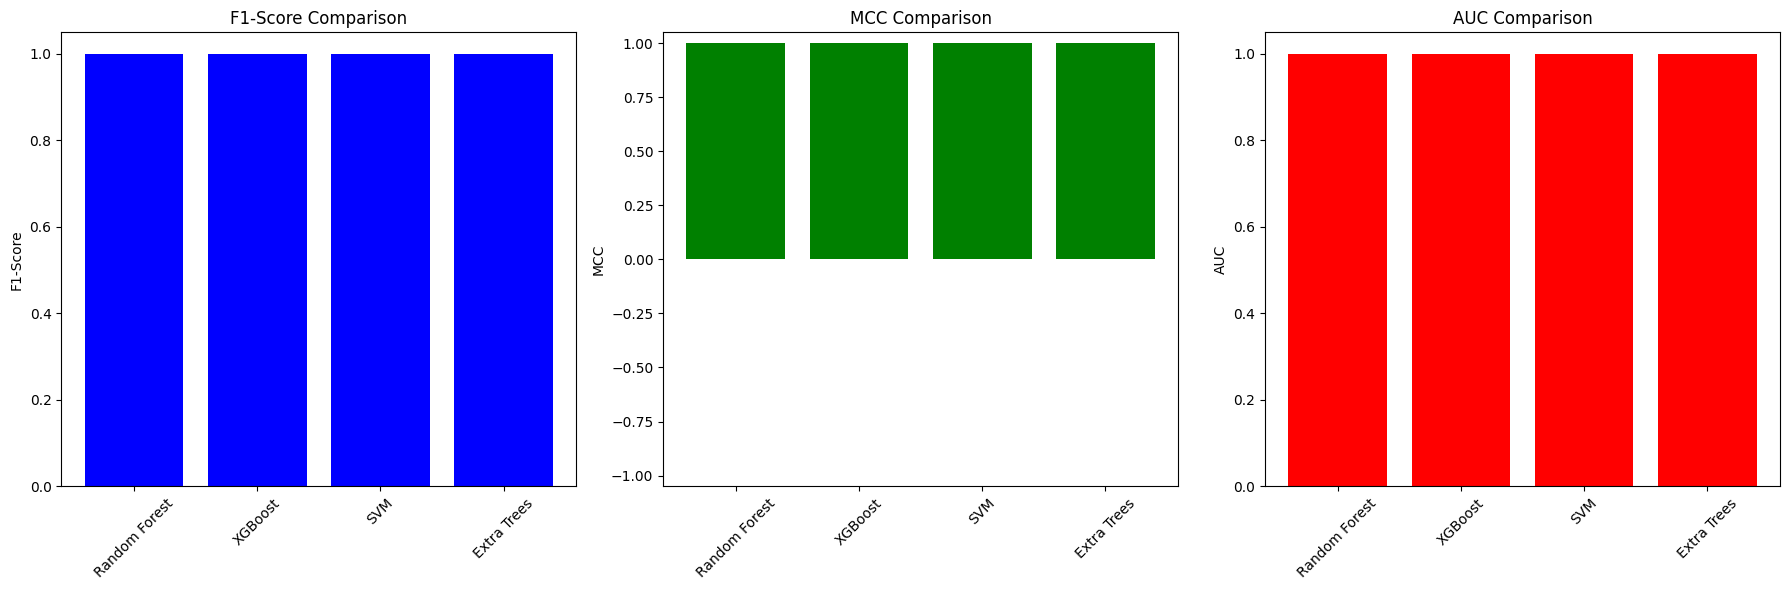

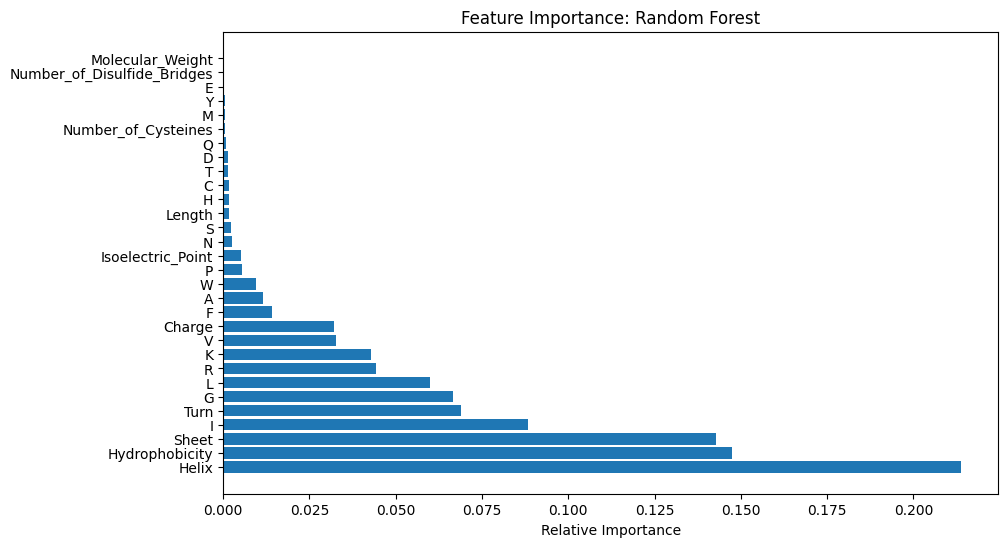

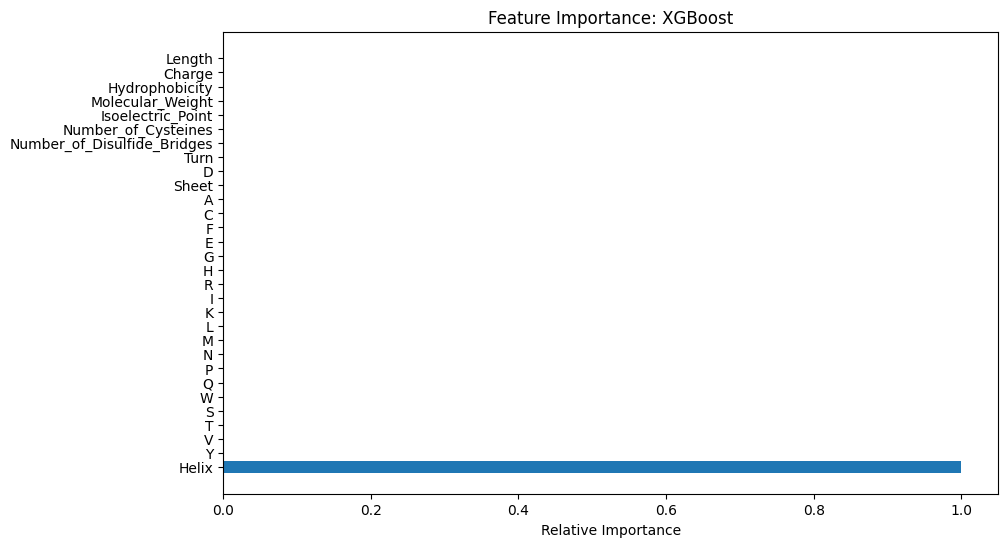

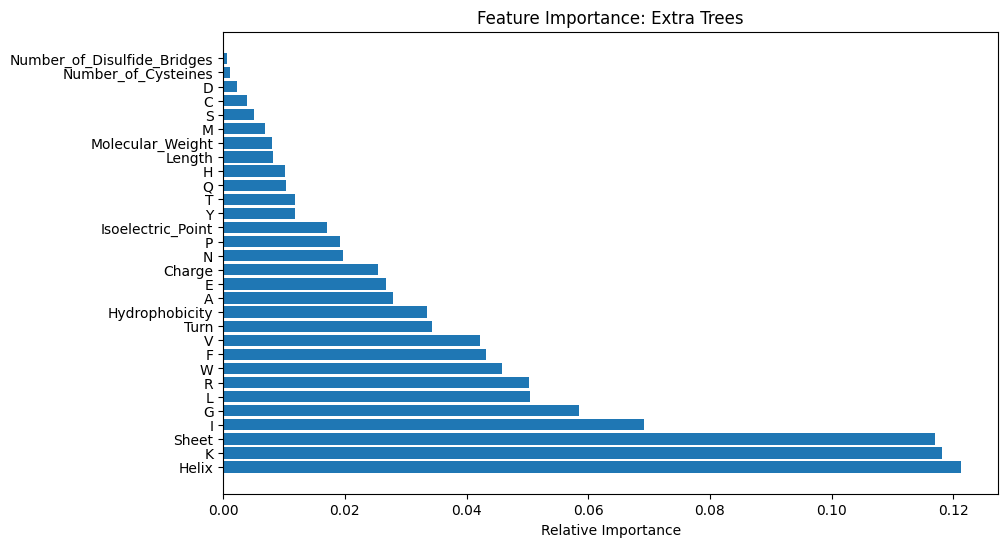

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold # Import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Load the already separated datasets
X_train = pd.read_csv('/content/drive/MyDrive/EC/X_train.csv').drop(columns=['Flexibility'])
y_train = pd.read_csv('/content/drive/MyDrive/EC/y_train.csv').squeeze()

X_test = pd.read_csv('/content/drive/MyDrive/EC/X_test.csv').drop(columns=['Flexibility'])
y_test = pd.read_csv('/content/drive/MyDrive/EC/y_test.csv').squeeze()

# Standardize the features (important for models like logistic regression and XGBoost)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)
ext_model = ExtraTreesClassifier(random_state=42)

# List of models to evaluate
models = {
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'SVM': svm_model,
    'Extra Trees': ext_model
}

# Define function to calculate metrics
def calculate_metrics(y_true, y_pred):
    # Confusion Matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Sensitivity (Recall for class 1)
    sensitivity = tp / (tp + fn)

    # Specificity (Recall for class 0)
    specificity = tn / (tn + fp)

    # Precision
    precision = precision_score(y_true, y_pred)

    # Recall
    recall = recall_score(y_true, y_pred)

    # F1-Score
    f1 = f1_score(y_true, y_pred)

    # Matthews Correlation Coefficient (MCC)
    mcc = matthews_corrcoef(y_true, y_pred)


    try:
        auc = roc_auc_score(y_true, y_pred)
    except ValueError:
        # Handle the case where y_true contains only one class, which prevents AUC calculation
        auc = np.nan # Or some other indicator

    return {
        'TN': tn, 'FP': fp, 'FN': fn, 'TP': tp,
        'Sensitivity': sensitivity, 'Specificity': specificity,
        'Precision': precision, 'Recall': recall,
        'F1 Score': f1, 'MCC': mcc, 'AUC': auc}

# Initialize a dictionary to store the metrics
model_metrics = {}

# Perform cross-validation and print results for each model
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}")

    # Perform cross-validation (using 5-folds)
    # Use X_train_scaled and y_train for CV
    cv_results = cross_validate(model, X_train_scaled, y_train, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='accuracy', return_estimator=True)


    print(f"Cross-validation accuracy scores: {cv_results['test_score']}")
    print(f"Mean cross-validation accuracy: {cv_results['test_score'].mean():.4f}")

    # Fit model to the entire training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test_scaled)

    # Calculate various evaluation metrics
    metrics = calculate_metrics(y_test, y_pred)
    model_metrics[model_name] = metrics

    # Display the confusion matrix and performance metrics
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nPerformance Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}") # Format metrics for better readability

# Plot Model Comparison: F1-Score, MCC, and AUC (Accuracy is also good but F1/MCC are better for imbalanced data)
model_names = list(model_metrics.keys())
f1_scores = [metrics['F1 Score'] for metrics in model_metrics.values()] # Changed 'accuracy' to 'F1 Score' for the plot
mcc = [metrics['MCC'] for metrics in model_metrics.values()]
auc = [metrics['AUC'] for metrics in model_metrics.values()]


# Creating the plot for comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot F1-Score comparison
axes[0].bar(model_names, f1_scores, color='blue')
axes[0].set_title('F1-Score Comparison')
axes[0].set_ylabel('F1-Score')
axes[0].set_xticklabels(model_names, rotation=45)
axes[0].set_ylim(0, 1.05) # Set y-limit for better comparison

# Plot MCC Comparison
axes[1].bar(model_names, mcc, color='green')
axes[1].set_title('MCC Comparison')
axes[1].set_ylabel('MCC')
axes[1].set_xticklabels(model_names, rotation=45)
axes[1].set_ylim(-1.05, 1.05) # MCC ranges from -1 to 1

# Plot AUC Comparison
axes[2].bar(model_names, auc, color='red')
axes[2].set_title('AUC Comparison')
axes[2].set_ylabel('AUC')
axes[2].set_xticklabels(model_names, rotation=45)
axes[2].set_ylim(0, 1.05) # AUC ranges from 0 to 1


plt.tight_layout()
plt.show()

# Feature Importance Plot (only for tree-based models)
# Ensure you use the correct feature names from X_train
feature_names = X_train.columns # Get column names from the original DataFrame

for model_name in ['Random Forest', 'XGBoost', 'Extra Trees']:
    model = models[model_name]
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        # Ensure indices correspond to the scaled data if the model was trained on scaled data
        # Since we trained on scaled data, the order of importances corresponds to the columns in X_train_scaled/X_train
        indices = np.argsort(importances)[::-1]

        # Plot feature importance
        plt.figure(figsize=(10, 6))
        plt.title(f'Feature Importance: {model_name}')
        # Use the feature_names list for the y-axis labels
        plt.barh(range(X_train_scaled.shape[1]), importances[indices], align="center")
        plt.yticks(range(X_train_scaled.shape[1]), [feature_names[i] for i in indices]) # Use feature_names[i]
        plt.xlabel('Relative Importance')
        plt.show()

In [113]:
pip install pandas matplotlib seaborn scikit-learn imbalanced-learn


In [15]:
import pandas as pd

# Load datasets
X_train = pd.read_csv('/content/drive/MyDrive/EC/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/EC/y_train.csv').squeeze()

X_test = pd.read_csv('/content/drive/MyDrive/EC/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/EC/y_test.csv').squeeze()


In [64]:
# Remove unnamed columns if present
X_train = X_train.loc[:, ~X_train.columns.str.contains('^Unnamed', case=False)]
X_test = X_test.loc[:, ~X_test.columns.str.contains('^Unnamed', case=False)]

# Align test columns with train
X_test = X_test[X_train.columns]

# Check for missing values
print("Missing in X_train:\n", X_train.isnull().sum())
print("Missing in X_test:\n", X_test.isnull().sum())

# Optional: Fill missing values
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)


Missing in X_train:
 Length                         0
Charge                         0
Hydrophobicity                 0
Molecular_Weight               0
Isoelectric_Point              0
Number_of_Cysteines            0
Number_of_Disulfide_Bridges    0
Helix                          0
Turn                           0
Sheet                          0
A                              0
C                              0
D                              0
E                              0
F                              0
G                              0
H                              0
I                              0
K                              0
L                              0
M                              0
N                              0
P                              0
Q                              0
R                              0
S                              0
T                              0
V                              0
W                              0
Y                     

In [65]:
import pandas as pd

# Combine features and target into one DataFrame
df_corr = X_train.copy()
df_corr['Target'] = y_train

# Calculate correlation matrix
corr_matrix = df_corr.corr()

# Extract and sort correlations with the target
target_corr = corr_matrix['Target'].drop('Target')  # drop self-correlation
target_corr_sorted = target_corr.abs().sort_values(ascending=False)

# Print correlations
print("Feature-to-Target Correlations (sorted by absolute value):\n")
for feature in target_corr_sorted.index:
    print(f"{feature}: {corr_matrix.loc[feature, 'Target']:.4f}")


Feature-to-Target Correlations (sorted by absolute value):

Helix: 0.8560
Sheet: 0.7582
Hydrophobicity: 0.6888
K: 0.6776
Charge: 0.6458
I: 0.6188
L: 0.6175
V: 0.5855
G: 0.5629
R: 0.5390
A: 0.5352
Isoelectric_Point: 0.5194
Turn: 0.5123
F: 0.5090
W: 0.4894
T: 0.4050
E: 0.4027
Q: 0.3889
N: 0.3775
S: 0.3607
Length: -0.3547
P: 0.3325
Molecular_Weight: -0.3279
H: 0.3146
Y: 0.3037
M: 0.2595
C: 0.2181
D: 0.2060
Number_of_Disulfide_Bridges: 0.0641
Number_of_Cysteines: -0.0220


In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# 1. Load data
X_train = pd.read_csv('/content/drive/MyDrive/EC/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/EC/y_train.csv').squeeze()

X_test = pd.read_csv('/content/drive/MyDrive/EC/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/EC/y_test.csv').squeeze()

# 2. Split training data into train and validation sets
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# 3. Scale features only for SVM
scaler = StandardScaler()
X_train_sub_scaled = scaler.fit_transform(X_train_sub)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# 4. Initialize models
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
svm = SVC(random_state=42)

# 5. Train models on training subset
rf.fit(X_train_sub, y_train_sub)
xgb.fit(X_train_sub, y_train_sub)
svm.fit(X_train_sub_scaled, y_train_sub)

# 6. Validate models on validation set
print("Random Forest Validation Performance:\n")
print(classification_report(y_val, rf.predict(X_val)))

print("XGBoost Validation Performance:\n")
print(classification_report(y_val, xgb.predict(X_val)))

print("SVM Validation Performance:\n")
print(classification_report(y_val, svm.predict(X_val_scaled)))

# 7. Final test on unseen test data
print("Random Forest Test Performance:\n")
print(classification_report(y_test, rf.predict(X_test)))

print("XGBoost Test Performance:\n")
print(classification_report(y_test, xgb.predict(X_test)))

print("SVM Test Performance:\n")
print(classification_report(y_test, svm.predict(X_test_scaled)))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:49:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Random Forest Validation Performance:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        17

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33

XGBoost Validation Performance:

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.94      1.00      0.97        17

    accuracy                           0.97        33
   macro avg       0.97      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33

SVM Validation Performance:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        17

    accuracy                           1.00        33
   macro avg       1.00    

Random Forest 5-fold CV accuracy scores: [1. 1. 1. 1. 1.]
Random Forest Mean CV accuracy: 1.0000 ± 0.0000



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:49:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:49:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:49:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:49:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:49:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost 5-fold CV accuracy scores: [1.         1.         1.         0.87878788 1.        ]
XGBoost Mean CV accuracy: 0.9758 ± 0.0485

SVM 5-fold CV accuracy scores: [0.72727273 0.54545455 0.66666667 0.57575758 0.57575758]
SVM Mean CV accuracy: 0.6182 ± 0.0680



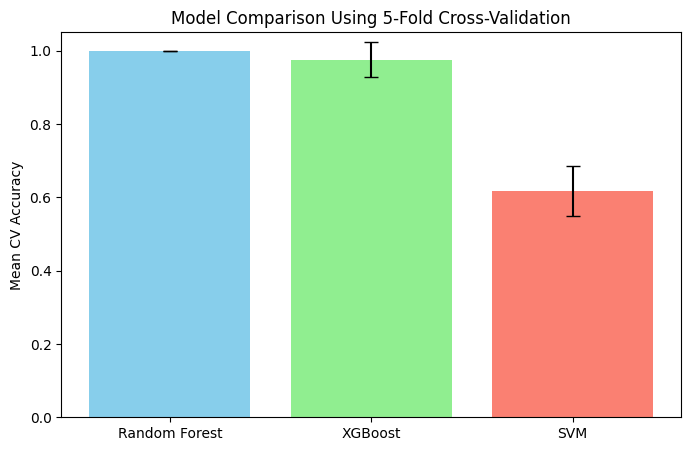

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'SVM': SVC(random_state=42)
}

cv_results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_results[name] = scores
    print(f"{name} 5-fold CV accuracy scores: {scores}")
    print(f"{name} Mean CV accuracy: {scores.mean():.4f} ± {scores.std():.4f}\n")

# Plot comparison
plt.figure(figsize=(8,5))
means = [cv_results[m].mean() for m in models]
stds = [cv_results[m].std() for m in models]

plt.bar(models.keys(), means, yerr=stds, capsize=5, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel('Mean CV Accuracy')
plt.title('Model Comparison Using 5-Fold Cross-Validation')
plt.ylim(0,1.05)
plt.show()


In [68]:
# 1. Import libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import joblib # Ensure joblib is imported if not already

# 2. Load data
X_train = pd.read_csv('/content/drive/MyDrive/EC/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/EC/y_train.csv').squeeze()

X_test = pd.read_csv('/content/drive/MyDrive/EC/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/EC/y_test.csv').squeeze()

# Remove any unwanted unnamed columns
X_train = X_train.loc[:, ~X_train.columns.str.contains('^Unnamed')]
X_test = X_test.loc[:, ~X_test.columns.str.contains('^Unnamed')]

# 3. Initialize model
model = RandomForestClassifier(random_state=42)

# 4. Cross-validation on training set (optional but recommended)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f"5-fold CV accuracy scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}\n")

# 5. Train model on full training data
model.fit(X_train, y_train)

# 6. Predict on test data
y_pred = model.predict(X_test)

# 7. Evaluate results
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Save model to file
# Corrected line: Pass the 'model' object and the filename
joblib.dump(model, '/content/drive/MyDrive/EC/best_model_rf.joblib')

# Optional: Add a success message
print("\nModel successfully saved to /content/drive/MyDrive/EC/best_model_rf.joblib")

5-fold CV accuracy scores: [1. 1. 1. 1. 1.]
Mean CV accuracy: 1.0000 ± 0.0000

Confusion Matrix:
[[22  0]
 [ 0 20]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        20

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42


Model successfully saved to /content/drive/MyDrive/EC/best_model_rf.joblib


In [69]:
# 1. Import libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# 2. Load data
X_train = pd.read_csv('/content/drive/MyDrive/EC/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/EC/y_train.csv').squeeze()

X_test = pd.read_csv('/content/drive/MyDrive/EC/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/EC/y_test.csv').squeeze()

# Remove unwanted unnamed columns
X_train = X_train.loc[:, ~X_train.columns.str.contains('^Unnamed')]
X_test = X_test.loc[:, ~X_test.columns.str.contains('^Unnamed')]

# 3. Initialize model
model = RandomForestClassifier(random_state=42)

# 4. Cross-validation on training set (optional)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f"5-fold CV accuracy scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}\n")

# 5. Train model on full training data
model.fit(X_train, y_train)

# 6. Predict classes on test data
y_pred = model.predict(X_test)

# 7. Predict probabilities on test data
y_prob = model.predict_proba(X_test)  # shape = (num_samples, num_classes)

# 8. Evaluate results
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 9. Example: print predicted probabilities for first 5 samples
print("\nPredicted class probabilities for first 5 test samples:")
for i, probs in enumerate(y_prob[:5]):
    print(f"Sample {i+1}: Class 0 prob = {probs[0]:.4f}, Class 1 prob = {probs[1]:.4f}")


5-fold CV accuracy scores: [1. 1. 1. 1. 1.]
Mean CV accuracy: 1.0000 ± 0.0000

Confusion Matrix:
[[22  0]
 [ 0 20]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        20

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42


Predicted class probabilities for first 5 test samples:
Sample 1: Class 0 prob = 1.0000, Class 1 prob = 0.0000
Sample 2: Class 0 prob = 0.0200, Class 1 prob = 0.9800
Sample 3: Class 0 prob = 0.0000, Class 1 prob = 1.0000
Sample 4: Class 0 prob = 1.0000, Class 1 prob = 0.0000
Sample 5: Class 0 prob = 0.0000, Class 1 prob = 1.0000


Load EC model predict kp active


=== Predictions ===
Sample 1: Predicted class = 0, Prob(class 0) = 0.9600, Prob(class 1) = 0.0400
Sample 2: Predicted class = 0, Prob(class 0) = 0.9500, Prob(class 1) = 0.0500
Sample 3: Predicted class = 0, Prob(class 0) = 0.9600, Prob(class 1) = 0.0400
Sample 4: Predicted class = 0, Prob(class 0) = 0.9400, Prob(class 1) = 0.0600
Sample 5: Predicted class = 0, Prob(class 0) = 0.9400, Prob(class 1) = 0.0600
Sample 6: Predicted class = 0, Prob(class 0) = 0.9600, Prob(class 1) = 0.0400
Sample 7: Predicted class = 0, Prob(class 0) = 0.9600, Prob(class 1) = 0.0400
Sample 8: Predicted class = 0, Prob(class 0) = 0.9600, Prob(class 1) = 0.0400
Sample 9: Predicted class = 0, Prob(class 0) = 0.9600, Prob(class 1) = 0.0400
Sample 10: Predicted class = 0, Prob(class 0) = 0.9500, Prob(class 1) = 0.0500
Sample 11: Predicted class = 0, Prob(class 0) = 0.9500, Prob(class 1) = 0.0500
Sample 12: Predicted class = 0, Prob(class 0) = 0.9600, Prob(class 1) = 0.0400
Sample 13: Predicted class = 0, Prob(cla

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


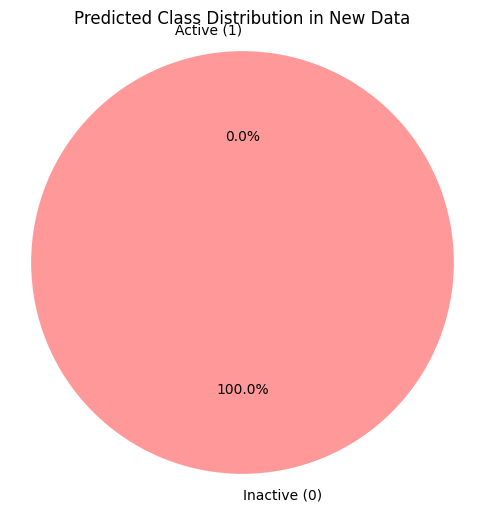

In [29]:
# --- Load the pre-trained model instead of retraining ---
model_path = '/content/drive/MyDrive/EC/best_model_rf.joblib'  # Replace with your saved model path
model = joblib.load(model_path)

# --- Load new data ---
new_data_path = '/content/drive/MyDrive/KP/klebsiella active class.csv'
new_data = pd.read_csv(new_data_path)

# Drop unwanted columns
cols_to_drop = ['ID', 'Sequence', 'Unnamed: 0']
new_data = new_data.drop(columns=[col for col in cols_to_drop if col in new_data.columns])

# Align columns with training data columns
X_train_cols = X_train.columns
missing_cols = set(X_train_cols) - set(new_data.columns)
for col in missing_cols:
    new_data[col] = np.nan  # Fill missing columns with NaN

new_data_aligned = new_data.reindex(columns=X_train_cols)

# Impute missing values using fitted imputer
new_data_imputed = pd.DataFrame(imputer.transform(new_data_aligned), columns=X_train_cols)

# Scale data using fitted scaler
new_data_scaled = pd.DataFrame(scaler.transform(new_data_imputed), columns=X_train_cols)

# Predict on new data
new_preds = model.predict(new_data_scaled)
if hasattr(model, 'predict_proba'):
    new_probs = model.predict_proba(new_data_scaled)
else:
    new_probs = None

# Print predictions
print("\n=== Predictions ===")
if new_probs is not None:
    for i, (pred, prob) in enumerate(zip(new_preds, new_probs), start=1):
        print(f"Sample {i}: Predicted class = {pred}, Prob(class 0) = {prob[0]:.4f}, Prob(class 1) = {prob[1]:.4f}")
else:
    for i, pred in enumerate(new_preds, start=1):
        print(f"Sample {i}: Predicted class = {pred}")

# Plot pie chart of predicted classes
unique, counts = np.unique(new_preds, return_counts=True)
count_dict = dict(zip(unique, counts))

labels = ['Inactive (0)', 'Active (1)']
sizes = [count_dict.get(0, 0), count_dict.get(1, 0)]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)
plt.title('Predicted Class Distribution in New Data')
plt.axis('equal')
plt.show()

In [6]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 27.1 MB/s eta 0:00:00


Load EC model predict PS active

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(



=== Predictions ===
Sample 1: Predicted class = 0, Prob(class 0) = 0.5000, Prob(class 1) = 0.5000
Sample 2: Predicted class = 1, Prob(class 0) = 0.4500, Prob(class 1) = 0.5500
Sample 3: Predicted class = 0, Prob(class 0) = 0.5000, Prob(class 1) = 0.5000
Sample 4: Predicted class = 0, Prob(class 0) = 0.5000, Prob(class 1) = 0.5000
Sample 5: Predicted class = 0, Prob(class 0) = 0.5300, Prob(class 1) = 0.4700
Sample 6: Predicted class = 0, Prob(class 0) = 0.5100, Prob(class 1) = 0.4900
Sample 7: Predicted class = 0, Prob(class 0) = 0.5100, Prob(class 1) = 0.4900
Sample 8: Predicted class = 0, Prob(class 0) = 0.5100, Prob(class 1) = 0.4900
Sample 9: Predicted class = 0, Prob(class 0) = 0.6600, Prob(class 1) = 0.3400
Sample 10: Predicted class = 1, Prob(class 0) = 0.3400, Prob(class 1) = 0.6600
Sample 11: Predicted class = 0, Prob(class 0) = 0.5100, Prob(class 1) = 0.4900
Sample 12: Predicted class = 0, Prob(class 0) = 0.5400, Prob(class 1) = 0.4600
Sample 13: Predicted class = 0, Prob(cla

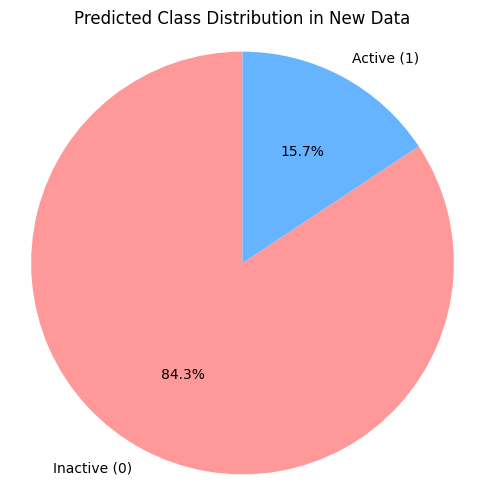

In [28]:

# --- Load the pre-trained model instead of retraining ---
model_path = '/content/drive/MyDrive/EC/best_model_rf.joblib'  # Replace with your saved model path
model = joblib.load(model_path)

# --- Load new data ---
new_data_path = '/content/drive/MyDrive/PS/PS_Active_Feature_v2.csv'
new_data = pd.read_csv(new_data_path)

# Drop unwanted columns
cols_to_drop = ['ID', 'Sequence', 'Unnamed: 0']
new_data = new_data.drop(columns=[col for col in cols_to_drop if col in new_data.columns])

# Align columns with training data columns
X_train_cols = X_train.columns
missing_cols = set(X_train_cols) - set(new_data.columns)
for col in missing_cols:
    new_data[col] = np.nan  # Fill missing columns with NaN

new_data_aligned = new_data.reindex(columns=X_train_cols)

# Impute missing values using fitted imputer
new_data_imputed = pd.DataFrame(imputer.transform(new_data_aligned), columns=X_train_cols)

# Scale data using fitted scaler
new_data_scaled = pd.DataFrame(scaler.transform(new_data_imputed), columns=X_train_cols)

# Predict on new data
new_preds = model.predict(new_data_scaled)
if hasattr(model, 'predict_proba'):
    new_probs = model.predict_proba(new_data_scaled)
else:
    new_probs = None

# Print predictions
print("\n=== Predictions ===")
if new_probs is not None:
    for i, (pred, prob) in enumerate(zip(new_preds, new_probs), start=1):
        print(f"Sample {i}: Predicted class = {pred}, Prob(class 0) = {prob[0]:.4f}, Prob(class 1) = {prob[1]:.4f}")
else:
    for i, pred in enumerate(new_preds, start=1):
        print(f"Sample {i}: Predicted class = {pred}")

# Plot pie chart of predicted classes
unique, counts = np.unique(new_preds, return_counts=True)
count_dict = dict(zip(unique, counts))

labels = ['Inactive (0)', 'Active (1)']
sizes = [count_dict.get(0, 0), count_dict.get(1, 0)]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)
plt.title('Predicted Class Distribution in New Data')
plt.axis('equal')
plt.show()

In [30]:
# Print model info
print(f"Model used: {type(model).__name__}")

# Print feature names used by the model (i.e., columns in X_train)
print("Features used in the model:")
for i, feat in enumerate(X_train.columns, start=1):
    print(f"{i}. {feat}")


Model used: RandomForestClassifier
Features used in the model:
1. Length
2. Charge
3. Hydrophobicity
4. Molecular_Weight
5. Isoelectric_Point
6. Number_of_Cysteines
7. Number_of_Disulfide_Bridges
8. Flexibility
9. Helix
10. Turn
11. Sheet
12. A
13. C
14. D
15. E
16. F
17. G
18. H
19. I
20. K
21. L
22. M
23. N
24. P
25. Q
26. R
27. S
28. T
29. V
30. W
31. Y


In [31]:
print(f"Model used: {type(model).__name__}")

print("Features used in the model:")
for i, feat in enumerate(X_train.columns, start=1):
    print(f"{i}. {feat}")


Model used: RandomForestClassifier
Features used in the model:
1. Length
2. Charge
3. Hydrophobicity
4. Molecular_Weight
5. Isoelectric_Point
6. Number_of_Cysteines
7. Number_of_Disulfide_Bridges
8. Flexibility
9. Helix
10. Turn
11. Sheet
12. A
13. C
14. D
15. E
16. F
17. G
18. H
19. I
20. K
21. L
22. M
23. N
24. P
25. Q
26. R
27. S
28. T
29. V
30. W
31. Y


New data that modified from kp model

Data modified and use mutated to predict , the result predict from kp model that (active class)

In [32]:
import pandas as pd

# === Load Data ===
file_path = '/content/drive/MyDrive/KP Model/top_mutated_peptides_all_features.csv'  # Update path if needed
data = pd.read_csv(file_path, encoding='ISO-8859-1')  # ✅ Remove the comma!

# === Show basic information ===
print("===== First 5 Rows of the Data =====")
print(data.head())  # View first few rows

print("\n===== Index Information =====")
print(data.index)   # Show index range

print("\n===== Column Names =====")
print(data.columns)  # View column headers


===== First 5 Rows of the Data =====
          Original          Mutated  RandomForest_Prob  XGBoost_Prob  \
0     SSSSSYGSGRRF     SSSAPLLSGRRF           0.996970      0.948125   
1   GLRSVGASRHQGPL   GGRFVPASRHQLPL           0.754241      0.986582   
2  PPKKPEGPRSHQHKS  PPIIPEGMRSHQHVS           0.996970      0.859487   
3     RGSGGFGSTGKN     FGWGGKGSTGHN           0.996970      0.842540   
4    VLNQLFPGYGNGR    VLNQRRPFAGNGR           0.995980      0.809023   

   SVM_Prob  Average_Prob  
0  0.948125      0.964407  
1  0.986582      0.909135  
2  0.859487      0.905315  
3  0.842540      0.894017  
4  0.809023      0.871342  

===== Index Information =====
RangeIndex(start=0, stop=20, step=1)

===== Column Names =====
Index(['Original', 'Mutated', 'RandomForest_Prob', 'XGBoost_Prob', 'SVM_Prob',
       'Average_Prob'],
      dtype='object')


Calculation Descriptors

In [33]:
import pandas as pd
from Bio.SeqUtils import molecular_weight
from Bio.Seq import Seq

# === Load Data ===
file_path = '/content/drive/MyDrive/KP Model/top_mutated_peptides_all_features.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# === Keep only Mutated column ===
sequences = data['Mutated']

# === Descriptor Functions ===

def calculate_charge(seq):
    return seq.count('K') + seq.count('R') + seq.count('H') - (seq.count('D') + seq.count('E'))

def calculate_molecular_weight(seq):
    return molecular_weight(Seq(seq), seq_type='protein')

def calculate_hydrophobicity(seq):
    hydrophobic_residues = 'AVILMFWP'
    return sum([1 for aa in seq if aa in hydrophobic_residues])

def calculate_number_of_cysteines(seq):
    return seq.count('C')

def calculate_number_of_disulfide_bridges(seq):
    return seq.count('C') // 2

def calculate_isoelectric_point(seq):
    pKa_acidic = {'D': 3.9, 'E': 4.25}
    pKa_basic = {'K': 10.5, 'R': 12.5, 'H': 6.0}
    acidic_count = sum([seq.count(aa) for aa in pKa_acidic])
    basic_count = sum([seq.count(aa) for aa in pKa_basic])
    if acidic_count + basic_count > 0:
        total = (
            sum([pKa_acidic[aa] * seq.count(aa) for aa in pKa_acidic]) +
            sum([pKa_basic[aa] * seq.count(aa) for aa in pKa_basic])
        )
        return total / (acidic_count + basic_count)
    return 7.0

def amino_acid_composition(seq):
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
    total = len(seq)
    return {aa: (seq.count(aa) / total) * 100 for aa in amino_acids}

def secondary_structure_features(seq):
    helix_aa = 'ALIVMFYW'
    sheet_aa = 'FYW'
    turn_aa = 'GP'
    helix = sum([seq.count(aa) for aa in helix_aa])
    sheet = sum([seq.count(aa) for aa in sheet_aa])
    turn = sum([seq.count(aa) for aa in turn_aa])
    flexibility = helix / len(seq) if len(seq) > 0 else 0
    return helix, turn, sheet, flexibility

# === Apply Descriptors ===
desc_df = pd.DataFrame()
desc_df['Mutated'] = sequences
desc_df['Length'] = sequences.apply(len)
desc_df['Charge'] = sequences.apply(calculate_charge)
desc_df['Molecular_Weight'] = sequences.apply(calculate_molecular_weight)
desc_df['Hydrophobicity'] = sequences.apply(calculate_hydrophobicity)
desc_df['Number_of_Cysteines'] = sequences.apply(calculate_number_of_cysteines)
desc_df['Number_of_Disulfide_Bridges'] = sequences.apply(calculate_number_of_disulfide_bridges)
desc_df['Isoelectric_Point'] = sequences.apply(calculate_isoelectric_point)

# Secondary structure
desc_df[['Helix', 'Turn', 'Sheet', 'Flexibility']] = sequences.apply(secondary_structure_features).apply(pd.Series)

# Amino Acid Composition (expand to columns)
aa_composition = sequences.apply(amino_acid_composition).apply(pd.Series)
desc_df = pd.concat([desc_df, aa_composition], axis=1)

# === Save the result ===
desc_df.to_csv('/content/drive/MyDrive/KP Model/mutated_peptides_descriptors.csv', index=False)

# === Preview output ===
print(desc_df.head())


           Mutated  Length  Charge  Molecular_Weight  Hydrophobicity  \
0     SSSAPLLSGRRF      12       2         1277.4293               5   
1   GGRFVPASRHQLPL      14       3         1534.7634               7   
2  PPIIPEGMRSHQHVS      15       2         1684.9165               7   
3     FGWGGKGSTGHN      12       2         1204.2509               2   
4    VLNQRRPFAGNGR      13       3         1484.6649               5   

   Number_of_Cysteines  Number_of_Disulfide_Bridges  Isoelectric_Point  Helix  \
0                    0                            0          12.500000    4.0   
1                    0                            0          10.333333    5.0   
2                    0                            0           7.187500    4.0   
3                    0                            0           8.250000    2.0   
4                    0                            0          12.500000    4.0   

   Turn  ...         M          N          P         Q          R          S  \


Load EC Model to predict the Modified sequence from KP


=== Predictions ===
Sample 1: Predicted class = 0, Prob(class 0) = 0.6500, Prob(class 1) = 0.3500
Sample 2: Predicted class = 0, Prob(class 0) = 0.7100, Prob(class 1) = 0.2900
Sample 3: Predicted class = 0, Prob(class 0) = 0.6500, Prob(class 1) = 0.3500
Sample 4: Predicted class = 1, Prob(class 0) = 0.4800, Prob(class 1) = 0.5200
Sample 5: Predicted class = 0, Prob(class 0) = 0.7400, Prob(class 1) = 0.2600
Sample 6: Predicted class = 0, Prob(class 0) = 0.6700, Prob(class 1) = 0.3300
Sample 7: Predicted class = 0, Prob(class 0) = 0.6500, Prob(class 1) = 0.3500
Sample 8: Predicted class = 0, Prob(class 0) = 0.6500, Prob(class 1) = 0.3500
Sample 9: Predicted class = 0, Prob(class 0) = 0.6600, Prob(class 1) = 0.3400
Sample 10: Predicted class = 0, Prob(class 0) = 0.6100, Prob(class 1) = 0.3900
Sample 11: Predicted class = 0, Prob(class 0) = 0.5700, Prob(class 1) = 0.4300
Sample 12: Predicted class = 0, Prob(class 0) = 0.6200, Prob(class 1) = 0.3800
Sample 13: Predicted class = 0, Prob(cla

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


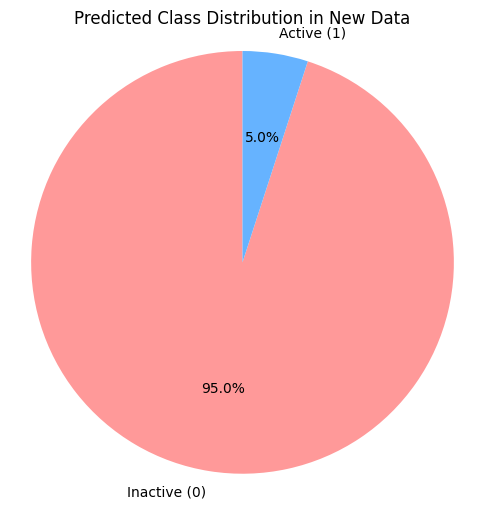

In [27]:


# --- Load the pre-trained model instead of retraining ---
model_path = '/content/drive/MyDrive/EC/best_model_rf.joblib'  # Replace with your saved model path
model = joblib.load(model_path)

# --- Load new data ---
new_data_path = '/content/drive/MyDrive/KP Model/mutated_peptides_descriptors.csv'
new_data = pd.read_csv(new_data_path)

# Drop unwanted columns
cols_to_drop = ['ID', 'Sequence', 'Unnamed: 0']
new_data = new_data.drop(columns=[col for col in cols_to_drop if col in new_data.columns])

# Align columns with training data columns
X_train_cols = X_train.columns
missing_cols = set(X_train_cols) - set(new_data.columns)
for col in missing_cols:
    new_data[col] = np.nan  # Fill missing columns with NaN

new_data_aligned = new_data.reindex(columns=X_train_cols)

# Impute missing values using fitted imputer
new_data_imputed = pd.DataFrame(imputer.transform(new_data_aligned), columns=X_train_cols)

# Scale data using fitted scaler
new_data_scaled = pd.DataFrame(scaler.transform(new_data_imputed), columns=X_train_cols)

# Predict on new data
new_preds = model.predict(new_data_scaled)
if hasattr(model, 'predict_proba'):
    new_probs = model.predict_proba(new_data_scaled)
else:
    new_probs = None

# Print predictions
print("\n=== Predictions ===")
if new_probs is not None:
    for i, (pred, prob) in enumerate(zip(new_preds, new_probs), start=1):
        print(f"Sample {i}: Predicted class = {pred}, Prob(class 0) = {prob[0]:.4f}, Prob(class 1) = {prob[1]:.4f}")
else:
    for i, pred in enumerate(new_preds, start=1):
        print(f"Sample {i}: Predicted class = {pred}")

# Plot pie chart of predicted classes
unique, counts = np.unique(new_preds, return_counts=True)
count_dict = dict(zip(unique, counts))

labels = ['Inactive (0)', 'Active (1)']
sizes = [count_dict.get(0, 0), count_dict.get(1, 0)]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)
plt.title('Predicted Class Distribution in New Data')
plt.axis('equal')
plt.show()
